In [1]:
# In this notebook, i will analyze data about a telephone line 
# that recieves calls about domestic violence. In the Dataset, i have some information
# about the victims and the aggressor: Victim's Age, gender, relationship with the agressor,
# and agressors' gender. I will try to predict the gender of the victim, using 4 years of data.
# It's a personal excercise about using classification algorytms.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import io
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/familyviolencecalls2017-2021/ViolenciaFamiliar.csv


In [2]:
#This dataset is in Spanish. I Will make some replacements, to avoid misstypes, and problems
#with other enviroments. I will output a file with all the replacements made.


Input = "../input/familyviolencecalls2017-2021/ViolenciaFamiliar.csv";
Output = "/kaggle/working/ViolenciaFamiliarReady.csv";

with io.open(Input,'r',encoding='UTF-8') as f:
	text = f.read()
	text = text.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u").replace("ñ","n")
	text = text.replace("Á","a").replace("É","e").replace("Í","i").replace("Ó","o").replace("Ú","u").replace("Ñ","n")
	text = text.replace("Sin dato","")

with io.open(Output,'w',encoding='utf8') as f:
    f.write(text)

In [3]:
#Let's examine the first rows
data = pd.read_csv("/kaggle/working/ViolenciaFamiliarReady.csv")
data.head()

    

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_atencion_provincia,llamado_atencion_provincia_id
0,344552.0,Comisaria,Masculino,Otra/o no familiar,Fisica y psicologica,27,18 a 29 anos,Femenino,3,1,Masculino,Pareja,La victima no acepto la intervencion del Equip...,2017-01-01,01:37,Ciudad Autonoma de Buenos Aires,2
1,344553.0,Comisaria,Femenino,s,Fisica y psicologica,NaN,NaN,Femenino,2,1,Masculino,Hermano/a,Llamante solicito informacion y/o orientacion,2017-01-01,06:42,Ciudad Autonoma de Buenos Aires,2
2,344554.0,Victima,Femenino,Madre,Fisica y psicologica,NaN,NaN,Femenino,1,1,Masculino,Pareja,Llamante solicito informacion y/o orientacion,2017-01-01,06:48,Ciudad Autonoma de Buenos Aires,2
3,344555.0,Victima,Femenino,No hay ninas/os,Fisica y psicologica,NaN,NaN,Femenino,1,1,Masculino,Pareja,Llamante solicito informacion y/o orientacion,2017-01-01,06:54,Ciudad Autonoma de Buenos Aires,2
4,344556.0,Comisaria,Masculino,Otra/o no familiar,Psicologica,NaN,NaN,Masculino,1,1,Femenino,Madre,Llamante solicito informacion y/o orientacion,2017-01-01,07:11,Ciudad Autonoma de Buenos Aires,2


In [4]:
#I will create a dictionary with the ammount of victims per reation with the aggressor, and in the same FOR i will calculate vicrims per gender
Aggresors = data.agresor_relacion_victima.unique()
VictimsGender = data.victima_genero.unique()
Q = lst = [0] * len(Aggresors)
AgressorsVictim = dict(zip(Aggresors,Q))
Q = lst = [0] * len(VictimsGender)
VictimsGenderQ = dict(zip(VictimsGender,Q))
for index,row in data.iterrows():
    AgressorsVictim[row['agresor_relacion_victima']]= AgressorsVictim[row['agresor_relacion_victima']]+row['victima_cantidad']
    VictimsGenderQ[row['victima_genero']]= VictimsGenderQ[row['victima_genero']]+row['victima_cantidad']
print(AgressorsVictim)
print(VictimsGenderQ)

{'Pareja': 21727, 'Hermano/a': 2415, 'Madre': 6508, 'Hijo/a': 3812, 'Ex pareja': 15419, 'NS/NC': 3483, 'Otro/a no conviviente': 1742, 'Padre': 5899, 'Otro/a conviviente': 1286, 'Abuelo/a': 268, 'Padrastro': 1099, 'Hermana/o': 40, 'Madrastra': 33}
{'Femenino': 51901, 'Masculino': 7801, 'NS/NC': 3959, 'Transgenero': 70}


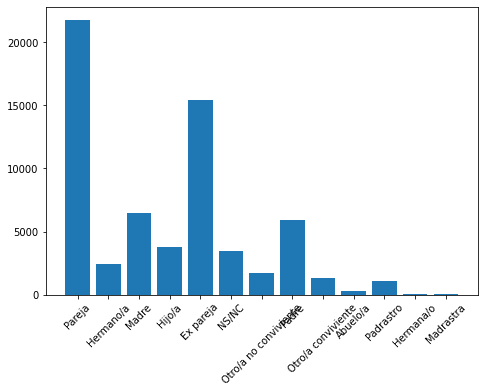

In [5]:
#Let's plot the data about victim's relation with the aggressor
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AgressorsVictim.keys(),AgressorsVictim.values())
plt.xticks(rotation=45)
#fig.bar(AgressorsVictim.keys(),AgressorsVictim.values())
fig.show()


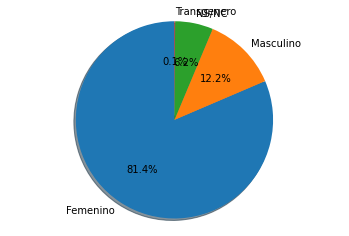

In [6]:
#Let's plot the distribution of gender in victims

labels = VictimsGenderQ.keys()
values = VictimsGenderQ.values()
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

#fig.bar(AgressorsVictim.keys(),AgressorsVictim.values())
fig.show()

In [7]:
#First i will encode categorical data. Some values same copule and ex-couple will be count as one. 
#After that y will erase nas in relevant dimensions.
CAT = {"victima_genero":     {"Transgenero": np.nan, "NS/NC": np.nan, "Femenino": 1,"Masculino": 2},
                "agresor_relacion_victima": {'Pareja': 1, 'Hermano/a': np.nan, 'Madre': 2, 'Hijo/a': 3, 'Ex pareja': 1, 'NS/NC': np.nan, 'Otro/a no conviviente': np.nan, 'Padre': 4, 'Otro/a conviviente': np.nan, 'Abuelo/a': 5, 'Padrastro': 4, 'Hermana/o': 6, 'Madrastra': 2},
                "agresor_genero": {"Transgenero": np.nan, "NS/NC": np.nan, "Femenino": 1,"Masculino": 2},
                 "victima_edad": {" ": np.nan}}
data = data.replace(CAT)

<AxesSubplot:>

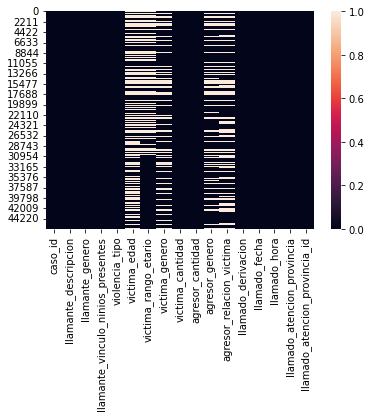

In [8]:
#lets analyze empty values with seaborn
sns.heatmap(data.isnull(),cbar = 'false')

In [9]:
#Delete the Nan Values.
data.dropna(subset=['agresor_relacion_victima','agresor_genero','victima_edad','victima_genero'], inplace=True)
data['victima_edad'] = data['victima_edad'].astype(int)
print(data.victima_genero.unique())
data.dtypes

[1. 2.]


caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_edad                           int64
victima_rango_etario                  object
victima_genero                       float64
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                       float64
agresor_relacion_victima             float64
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
llamado_atencion_provincia            object
llamado_atencion_provincia_id          int64
dtype: object

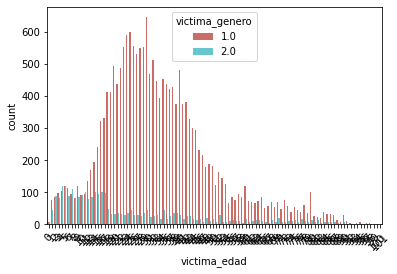

In [10]:
#Lets see the relatinship between the age of the victim and gender
sns.countplot(x='victima_edad', data=data, palette='hls', hue='victima_genero')
plt.xticks(rotation=45)
plt.show()

                          agresor_relacion_victima  agresor_genero  \
agresor_relacion_victima                  1.000000       -0.148307   
agresor_genero                           -0.148307        1.000000   
victima_edad                             -0.122965        0.132167   
victima_genero                            0.292058       -0.341875   

                          victima_edad  victima_genero  
agresor_relacion_victima     -0.122965        0.292058  
agresor_genero                0.132167       -0.341875  
victima_edad                  1.000000       -0.172781  
victima_genero               -0.172781        1.000000  


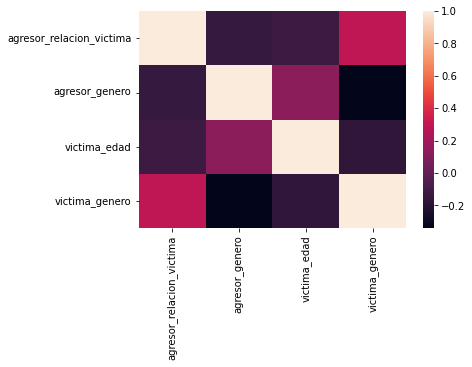

In [11]:

corr = data[['agresor_relacion_victima','agresor_genero','victima_edad','victima_genero']].corr()
sns.heatmap(corr, 
        xticklabels=['agresor_relacion_victima','agresor_genero','victima_edad','victima_genero'],
        yticklabels=['agresor_relacion_victima','agresor_genero','victima_edad','victima_genero'])
print(corr)

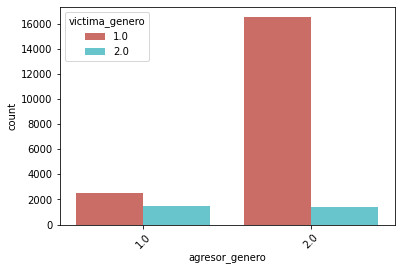

In [12]:
#Let's see relation of agressor gender and victims gender
sns.countplot(x='agresor_genero', data=data, palette='hls', hue='victima_genero')
plt.xticks(rotation=45)
plt.show()

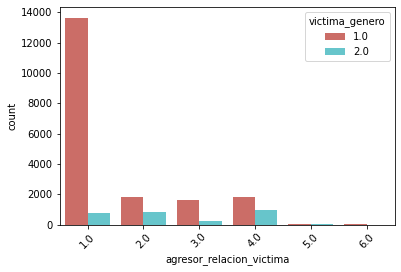

In [13]:
#Let's see relation of agressor relation and victims gender

sns.countplot(x='agresor_relacion_victima', data=data, palette='hls', hue='victima_genero')
plt.xticks(rotation=45)
plt.show()

In [14]:
#I will try to predict the victim's gender using the Age, the relationship with the victim, and gender of the agressor.
#Lets try with different models
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Import library to evaluate model
from sklearn.metrics import make_scorer, accuracy_score 

In [16]:
#Let's get separated the training and the test sets
from sklearn.model_selection import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(data[['agresor_relacion_victima','agresor_genero','victima_edad']], 
                                                    data['victima_genero'], test_size=0.20, random_state=42)



In [17]:
#SVC Model
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.8699817518248175


In [18]:
#Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8866332116788321


In [19]:
#Logistic Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8697536496350365


In [20]:
#K Neigthbors clasifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.8813868613138686


In [21]:
#Gauusian NB
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.8093065693430657


In [22]:
#DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.885492700729927


In [23]:
#In this case, Random Forest have the best prediction capacity.
#Let's try to improve the parameters with parameter optimization.
#Parameter tunning
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_training, y_training)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_


Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=10)

In [24]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rtopt = rf_clf.predict(X_valid)
acc_rtopt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.885492700729927
